<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**


# Introduction

* This worksheet and this data are about the amount of money people pay to rent properties in NYC.
* The data below was download from Streat Easy on 26 March 2024. It was saved without modification to my personal [github repo](https://github.com/tonythor/cuny-datascience/blob/develop/data/streetEasyMedianAskingRent_All.csv) to make this notebook portable. 
* Data used to generate the charts below is in the by borough, by neighborhood, and by year/month. Though it is not in time series format, we'll immediately put it into time series and chart from there.
* Then next logical step, though beyond the scope of this assignment, is forecasting.


# Plan

1. Wrangle: Load the raw data into pandas
2. Wrangle: Pivot, take all the month/year columns and stack them so there is one date column
3. Wrangle: Impute missing rent data, we'll do average by borough to keep it simple
4. Wrangle: Minor cleaning and formatting, finish with totally clean data set, as if ready to write to a CSV and use it in another platform.
5. Plot using matlab and seaborn
6. Conclusions



In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cuny  = "https://raw.githubusercontent.com/tonythor/cuny-datascience"
rentals = pd.read_csv(f"{cuny}/develop/data/streetEasyMedianAskingRent_All.csv") 
rentals.columns = rentals.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
rentals.drop('areatype', axis=1, inplace=True) # purposely dropped!

# Pivot data to tall format
rentals_pivoted_tall = rpt = rentals.melt(id_vars=["areaname", "borough"], var_name="date", value_name="rent")
# print(rpt.head(2))

# Impute data, do it by borough
mean_rent_by_borough = rpt.groupby('borough')['rent'].transform('mean')
rpt['rent'] = rpt['rent'].fillna(mean_rent_by_borough)
rpt['rent'] = rpt['rent'].round().astype(int)

# Convert 'date' to datetime
rpt['date'] = pd.to_datetime(rentals_pivoted_tall['date'], format='%Y-%m')

# print(rpt.head(2))
#               areaname    borough       date  rent
# 0         All Downtown  Manhattan 2010-01-01  3200
# 1          All Midtown  Manhattan 2010-01-01  2875


# For the places I'd like to graphs.
selected_areas = ['Bay Ridge', 'Dyker Heights', 'Sunset Park', 'Rockaway All']
selected = s = rpt[rpt['areaname'].isin(selected_areas)]
s = s.groupby(['date', 'areaname'])['rent'].mean().reset_index()
s['date'] = pd.to_datetime(s['date'], format='%Y-%m')


# Part 1: Using matplotlib: plot rent trends by borough and places I'd like to live 

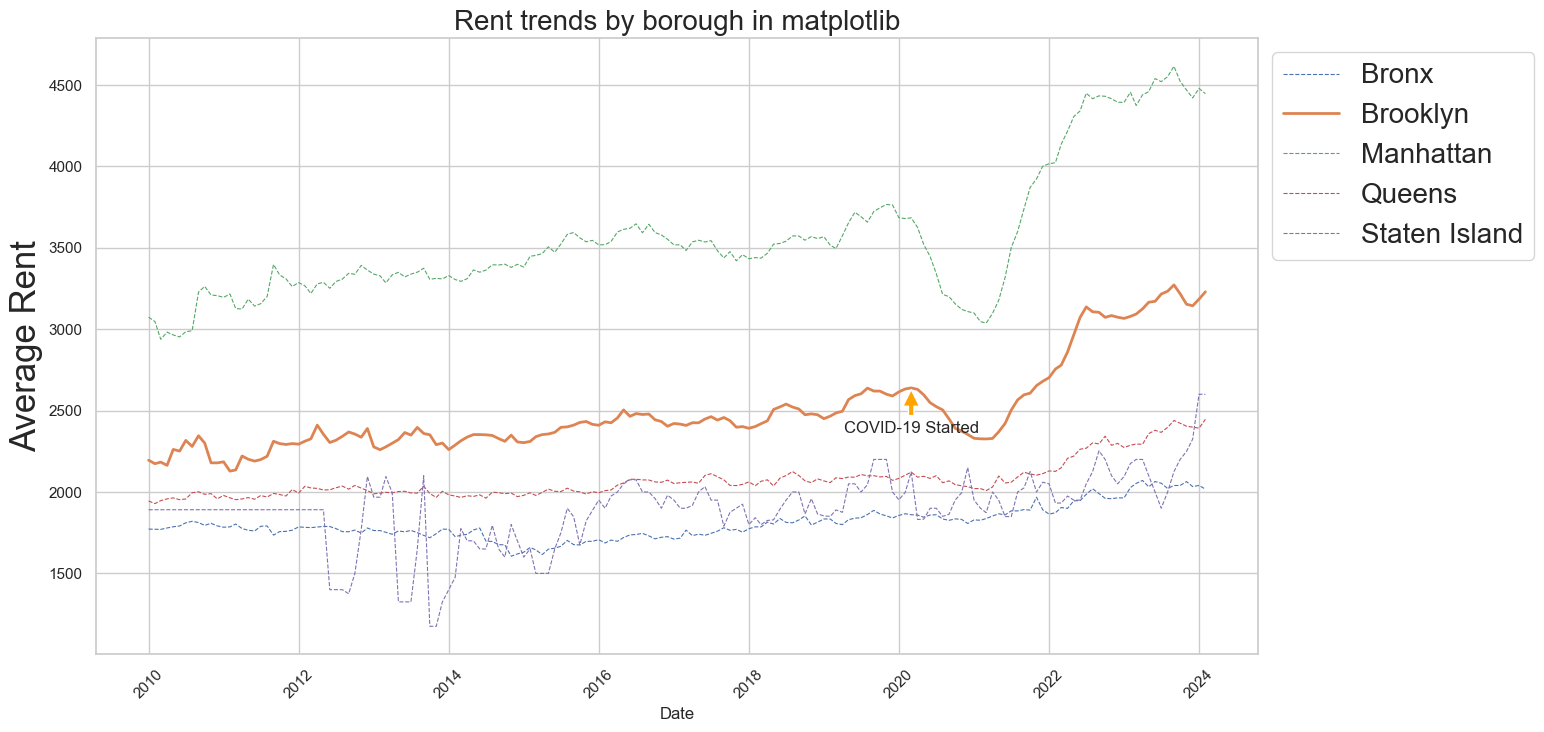

In [155]:
average_rent = rpt.groupby(['date', 'borough'])['rent'].mean().unstack()

plt.figure(figsize=(15, 8))
for column in average_rent.columns:
    if column == 'Brooklyn':
        plt.plot(average_rent.index, average_rent[column], label=column, linewidth=2)  # Brooklyn rules!
    else:
        plt.plot(average_rent.index, average_rent[column], label=column, linewidth=.8, linestyle='--' )
plt.title('Rent trends by borough in matplotlib', fontsize="20")
plt.xlabel('Date')
plt.ylabel('Average Rent', fontsize="25")

covid_start_date = pd.to_datetime('2020-03')
brooklyn_covid_rent = average_rent.loc[covid_start_date, 'Brooklyn']
plt.annotate(
    'COVID-19 Started', 
    xy=(covid_start_date, brooklyn_covid_rent), 
    xytext=(covid_start_date, brooklyn_covid_rent - 200), # Adjust text location
    arrowprops=dict(facecolor='orange', shrink=0.05),
    horizontalalignment='center', verticalalignment='top'
)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="20")  # move out legend
plt.xticks(rotation=45)

plt.show()

# Group* by 'date' and 'borough' to get average rent, and then pivot the data, and try to cram as many of those 
# Check* Use and change a legend position
# Check* Change a legend font size
# Check* Place a legend outside of the plot
# Check* Change the title and x/y labels
# Check* Change the marker, line colors, and line width
# Check* Modify Axis Text Ticks/Labels
# Check* Create a single legend for all subplots
# Check* Change size of axis Labels
# Check* Add annotations

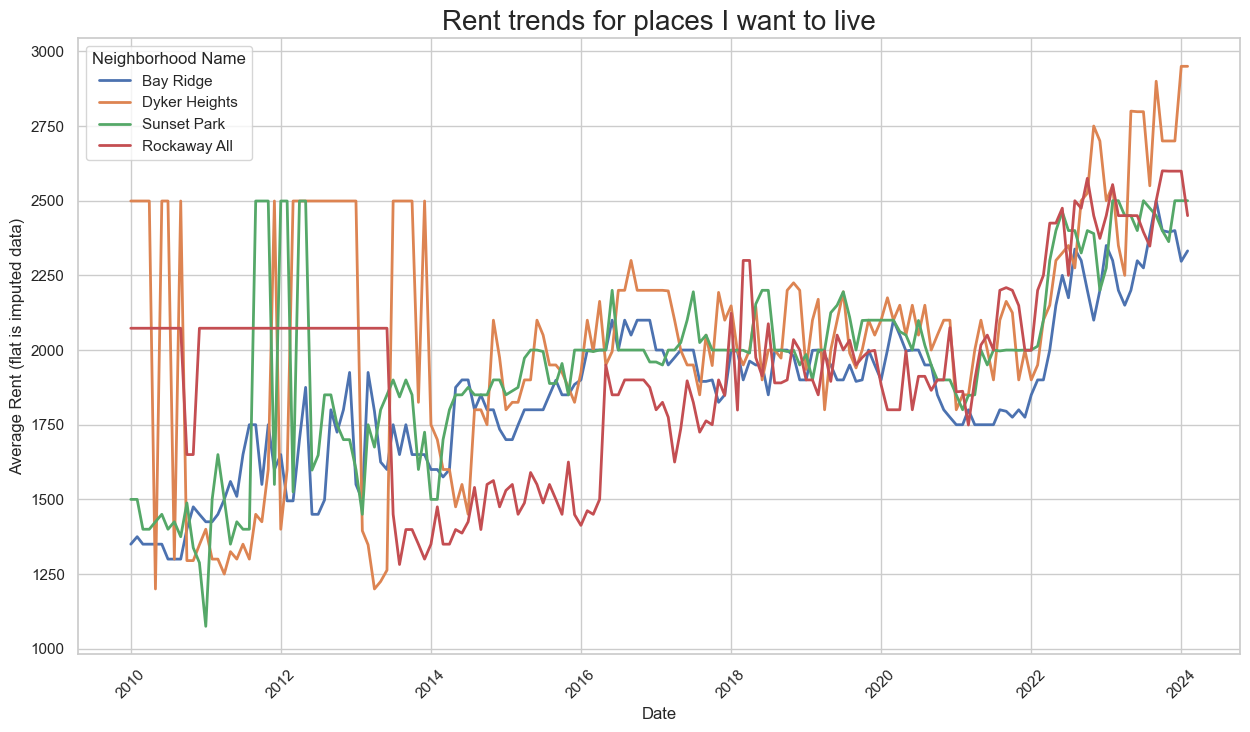

In [153]:
selected_areas = ['Bay Ridge', 'Dyker Heights', 'Sunset Park', 'Rockaway All']
selected = s = rpt[rpt['areaname'].isin(selected_areas)]
s = s.groupby(['date', 'areaname'])['rent'].mean().unstack()

s.index = pd.to_datetime(s.index, format='%Y-%m')
plt.figure(figsize=(15, 8))
for area in selected_areas:
    plt.plot(s.index, s[area], label=area, marker='', linewidth=2)
plt.title('Rent trends for places I want to live', fontsize="20")
plt.xlabel('Date')
plt.ylabel('Average Rent (flat is imputed data)')
plt.legend(title='Neighborhood Name')
plt.xticks(rotation=45)
plt.show()

# Part 2: Using seaborn: plot rent trends by borough and places I'd like to live 

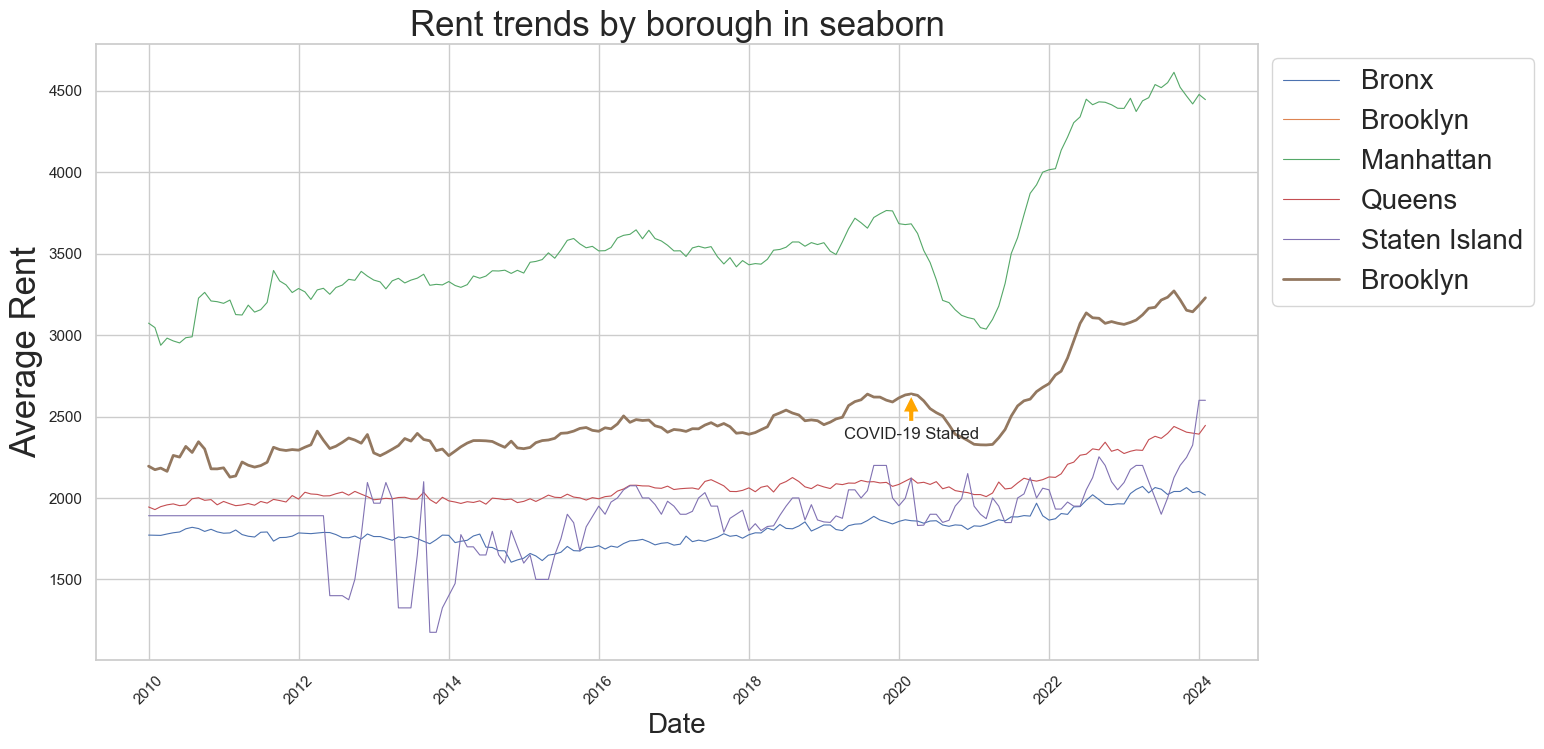

In [154]:
average_rent.index = pd.to_datetime(average_rent.index)  # Ensure the index is datetime

plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

average_rent_long = average_rent.reset_index().melt(id_vars='date', var_name='borough', value_name='rent')

sns.lineplot(x='date', y='rent', hue='borough', data=average_rent_long,  linewidth=0.8, style='borough', dashes=False)

brooklyn_line = average_rent_long[average_rent_long['borough'] == 'Brooklyn']

plt.plot(brooklyn_line['date'], brooklyn_line['rent'], label='Brooklyn', linewidth=2)


covid_start_date = pd.to_datetime('2020-03')
brooklyn_covid_rent = average_rent.loc[covid_start_date, 'Brooklyn']
plt.annotate( 'COVID-19 Started', 
    xy=(covid_start_date, brooklyn_covid_rent), 
    xytext=(covid_start_date, brooklyn_covid_rent - 200),  # Adjust text location
    arrowprops=dict(facecolor='orange', shrink=0.05),
    horizontalalignment='center', verticalalignment='top'
)

plt.title('Rent trends by borough in seaborn', fontsize=25)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Rent', fontsize=25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="20")  # move out legend
plt.xticks(rotation=45)
plt.show()


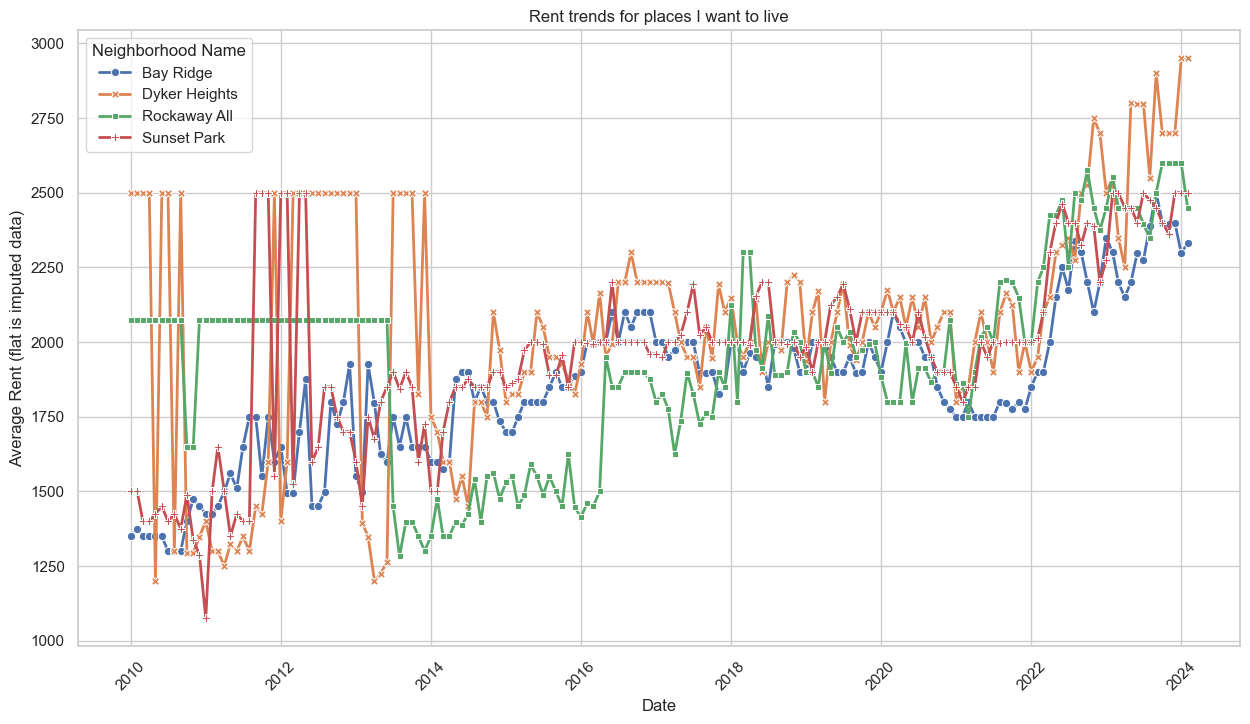

In [134]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=s, x='date', y='rent', hue='areaname', style='areaname', markers=True, dashes=False, linewidth=2)
plt.title('Rent trends for places I want to live')
plt.xlabel('Date')
plt.ylabel('Average Rent (flat is imputed data)')
plt.legend(title='Neighborhood Name')
plt.xticks(rotation=45)
plt.show()

# Part 3: Conclusions

## About the charting library differences

* To be honest, I don't think I pushed charts enough to compare these two libraries. I wanted to wrangle a time series, and I wanted to see the data Kristin L was using, so I loaded it myself. Becuase my charts were simple, I probably could have charted these simple datasets using Pandas plotting just as easily.

* By the time you get your data 100% prepared, it doesn't seem to be that much differnet between the two charting systems, or most any other charting library. A quick google search and whatever feature you want is up on your screen ready to be added to your chart.

* Indexs are difficult, but that's more of a pandas thing. I'd prefer to work with Spark anyway. 

* The one thing I liked was that, if I want to make a change, say to fontsize, if you can do it in matplotlib then you can copy/paste it into seaborn. 


## About the data
I've been watching rent go up, and I remember when people were getting the deals on cheap apartments during the covid. I didn't realize the Bronx had such stable apartment rates compared to Brooklyn and Manhattan. Also, it really sucks to watch this tragjectory keep going up. I think I might sign another two year lease.